In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav

import tol_colors
from scipy.interpolate import interp1d
from scipy.signal import convolve
#from labellines import *
import scipy

In [2]:
import astropy.units as u
from astropy.coordinates import SpectralCoord
import astropy
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu

def veltrans2(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu2

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)

def gaussian_psf(x, fwhm):
	#x = wavelength [nm]
	# fwhm in [nm]
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # Calculate sigma from FWHM
    tr = np.exp(-(x)**2 / (2 * (sigma**2)))
    tr /= tr.sum()
    return tr
#write adjustment for point spread function from atlas
def psf_adjust(wlsel,ilamsel,fwhm,new_dispersion_range,ntw,gaussian_psf):
    func=interp1d(wlsel,ilamsel,kind='linear',fill_value='extrapolate')
    yatlas = func(new_dispersion_range)
    dw=new_dispersion_range[1]-new_dispersion_range[0]
    dw=dw
    tw=(np.arange(ntw)-ntw//2)*dw
    
    for i in range(1):

    	psf = gaussian_psf(tw, fwhm) # guassian transmission profiles
    	yconv = convolve(yatlas, psf, mode='same', method='fft')
        
    return yconv


def doppler_to_wavelength(vel, rest_wave=396.847, speed_of_light=299792458):
    """
    Converts a Doppler shift (observed frequency) to wavelength.

    Args:
        observed_frequency (float or array-like): The observed frequency of the wave.
        rest_frequency (float): The rest frequency of the wave (frequency at the source).
        speed_of_light (float, optional): The speed of light in m/s. Defaults to 299792458 m/s.

    Returns:
         float or array-like: The wavelength corresponding to the observed frequency.
    """

    delwave = -rest_wave*vel*1000/speed_of_light
    return delwave

def doppler_shift(observed_wavelength, source_wavelength, speed_of_light=299792.458):
    """
    Calculates the Doppler shift (z) and radial velocity (v) given observed and source wavelengths.

    Args:
        observed_wavelength (float or numpy.ndarray): Observed wavelength(s).
        source_wavelength (float): Wavelength in the rest frame of the source.
        speed_of_light (float, optional): Speed of light in km/s. Defaults to 299792.458 km/s.

    Returns:
        tuple: A tuple containing:
            - doppler_shift (float or numpy.ndarray): The calculated Doppler shift (z).
            - radial_velocity (float or numpy.ndarray): The calculated radial velocity (v) in km/s.
    """
    doppler_shift = (observed_wavelength - source_wavelength) / source_wavelength
    radial_velocity = doppler_shift * speed_of_light
    return doppler_shift, radial_velocity

def doppler_shift_to_wavelength(observed_wavelength, velocity):
    """
    Converts observed wavelength to rest wavelength using the Doppler shift formula.

    Parameters:
        observed_wavelength: The observed wavelength in Angstroms (u.AA)
        velocity: The velocity of the object in km/s (u.km/s)

    Returns:
        rest_wavelength: The rest wavelength in Angstroms (u.nm)
    """

    observed_wavelength = observed_wavelength * u.nm
    velocity = velocity * u.km / u.second

    rest_wavelength = (observed_wavelength / (1 + velocity / astropy.constants.c)) - observed_wavelength

    return rest_wavelength.to(u.nm)

In [3]:
#general script many times
times = np.arange(60)

kr=16 #specify ca II H
lamb0=396.847 # change this and the instances below to wavelength of spectral line in nm as desired (as needed)
c=2.99e5
mu=.5 #viewing angle cos(theta) - choose between 0.05, 0.23, 0.5, 0.77, 0.95
muind = 2 # index corresponding to the value above; 0=0.05, 1=0.23, 2=0.5, 3=0.77, 4=0.95
fwhm=.05 #dkist FWHM
ntw=45 # DKIST NTW

#ncol2 = len(timesinit)#+len(times2)
#map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
#cmap_choice2 = map(np.linspace(0,1,ncol2))

#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Grid_For_Rahul/15_8_5e10_wRC.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/15_8_5e10_120_600.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug2024_Cclass.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_1e11_longdur_out.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/longdur_15_8_1e10.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/15_8_5e10_20_600.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Runs_SCPed/TC_model.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug_Cclass_d.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug2024_Cclass_d_proton.sav'
filename_updatedradyn = '/Users/coletamburri/Desktop/run_11Aug2024_Cclass_a_bigA.sav'

readradyn = readsav(filename_updatedradyn)


q = readradyn['q']
nq = readradyn['nq']
qnorm= readradyn['qnorm']
outintt = readradyn['outintt']
#nmu_new = readradyn['nmu']
nmu = 5
ne1t = readradyn['ne1t']
tg1t = readradyn['tg1t']
z1t = readradyn['z1t']
timet = readradyn['timet']
iel=readradyn['ielrad']
jr=readradyn['jrad']
ir=readradyn['irad']
#rji=readradyn['rji']
vz1t = readradyn['vz1t']

In [4]:
caii_h = outintt[:,16,2,1:nq[16]]
halpha = outintt[:,2,2,:]
hbeta = outintt[:,4,2,:]
hgamma = outintt[:,5,2,:]


In [5]:
np.shape(q[16,0:nq[16]-1])

(100,)

In [6]:
8*60

480

In [7]:
freq = q[16,0:nq[16]-1]*qnorm

(0.0, 5.5e-05)

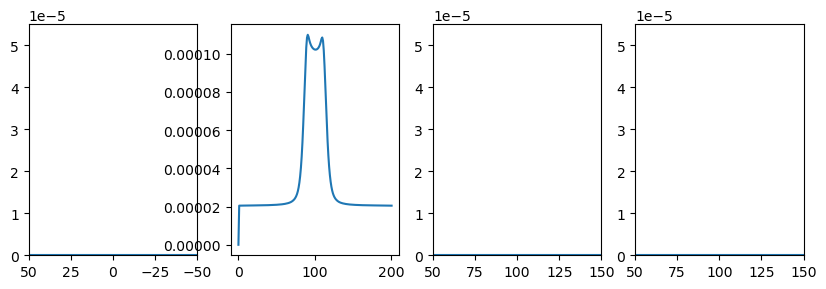

In [8]:
t = 0
fig,ax=plt.subplots(1,4,figsize=(10,3))
ax.flatten()[0].plot(freq,(caii_h[t,:]-caii_h[0,:]))
ax.flatten()[1].plot(halpha[2,:])

ax.flatten()[2].plot(hbeta[t,:]-hbeta[0,:])
ax.flatten()[3].plot(hgamma[t,:]-hgamma[0,:])

ax.flatten()[0].set_xlim([-50,50])
#ax.flatten()[1].set_xlim([50,150])
ax.flatten()[2].set_xlim([50,150])
ax.flatten()[3].set_xlim([50,150])

ax.flatten()[0].invert_xaxis()
ax.flatten()[0].set_ylim([0,5.5e-5])
#ax.flatten()[1].set_ylim([0,5.5e-5])
ax.flatten()[2].set_ylim([0,5.5e-5])
ax.flatten()[3].set_ylim([0,5.5e-5])



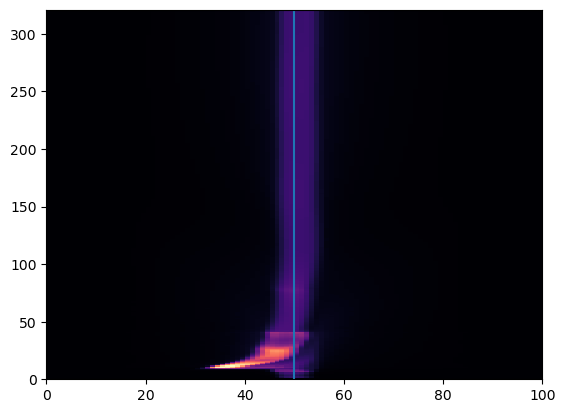

In [9]:
plt.pcolormesh(caii_h[:]-caii_h[0,:],cmap='magma')
#plt.ylim([0,600])
plt.axvline(50)

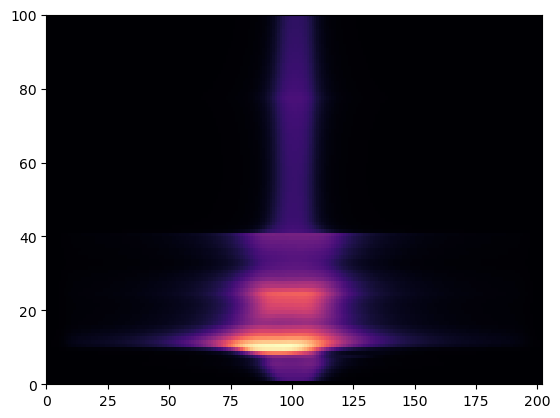

In [10]:
plt.pcolormesh(hbeta[0:100]-hbeta[0,:],cmap='magma')
#plt.xlim([25,75])

In [11]:
samples = np.arange(0,160,1)
#samples = [110,150]
samples

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159])

In [12]:

kr=16
wavelengths = (doppler_shift_to_wavelength(396.846,q[kr,:-1]*qnorm))


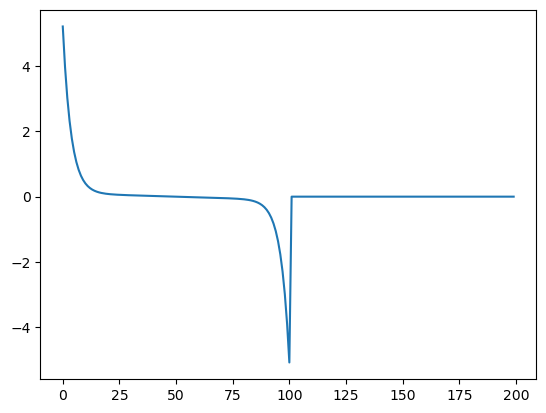

In [13]:
plt.plot(wavelengths)

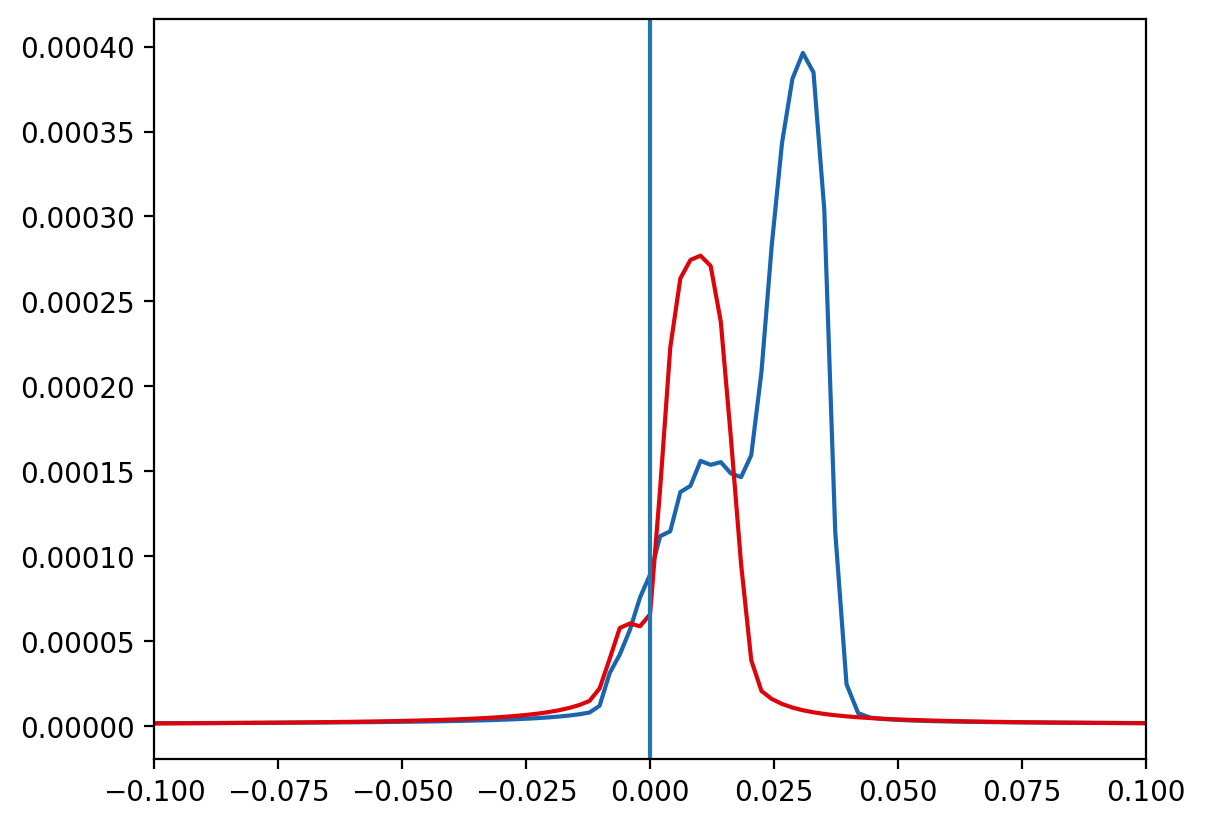

In [14]:

kr=16
wavelengths = (doppler_shift_to_wavelength(396.846,q[kr,:-1]*qnorm))
samples = [10,20]

fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(wavelengths[0:100],caii_h[samples[i],:]-caii_h[0,:],c=cmap_choice2[i],label=samples[i]/2)
#ax.legend(fontsize=5)
ax.set_xlim([-.1,.1])
ax.axvline(0)
#ax.invert_xaxis()

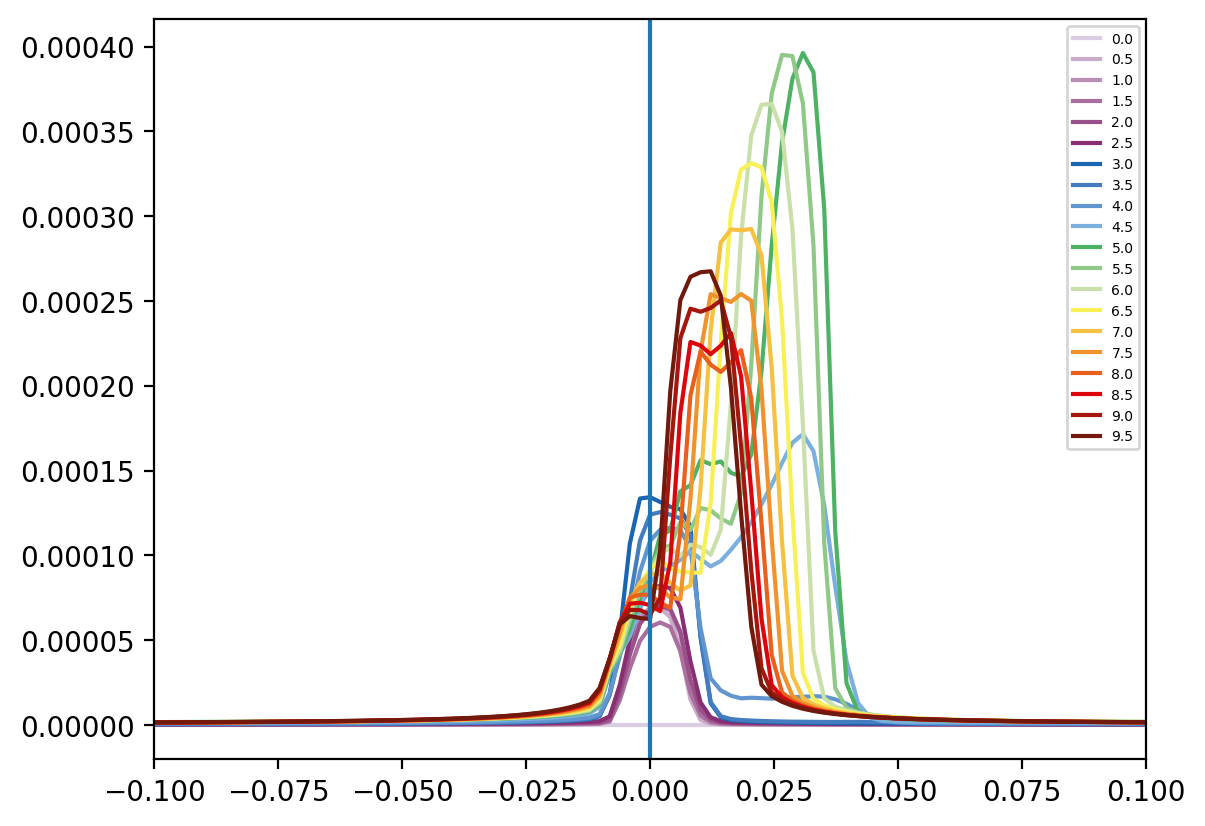

In [15]:
samples = np.arange(0,20,1)

fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(wavelengths[0:100],caii_h[samples[i],:]-caii_h[0,:],c=cmap_choice2[i],label=timet[i])
ax.legend(fontsize=5)
ax.set_xlim([-.1,.1])
ax.axvline(0)
#ax.invert_xaxis()

In [16]:
iel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype='>i4')

In [17]:
ir

array([1, 1, 2, 1, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 5, 5, 1, 1, 2, 2, 3, 1,
       2, 3, 4, 5, 1, 1, 2, 1, 3, 6, 6, 1, 2, 3, 4, 5, 6, 7, 8],
      dtype='>i4')

In [18]:
jr

array([2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 4, 5, 4, 5, 5, 6,
       6, 6, 6, 6, 2, 3, 4, 5, 5, 7, 8, 6, 6, 6, 6, 6, 9, 9, 9],
      dtype='>i4')

In [19]:
kr=4


In [20]:
np.shape(wavelengths)

(200,)

Text(0.5, 0, 'wavelength [nm]')

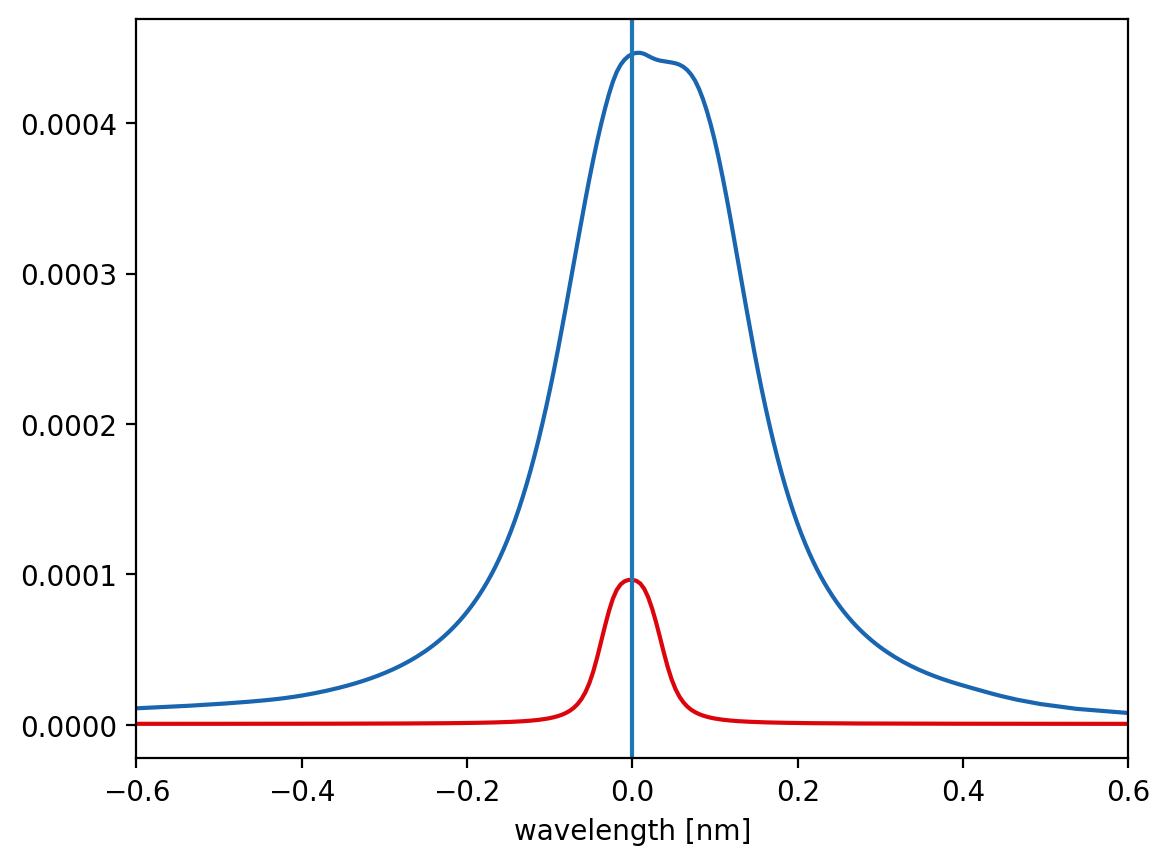

In [21]:
kr=4
wavelengths = (doppler_shift_to_wavelength(486.1,q[kr,:-1]*qnorm))

samples = np.arange(0,50,1)
samples = [11,50]


fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(wavelengths,hbeta[samples[i],:-2]-hbeta[0,:-2],c=cmap_choice2[i],label=timet[i])
#ax.legend(fontsize=5)
ax.set_xlim([-.6,.6])
ax.axvline(0)
ax.set_xlabel('wavelength [nm]')
#ax.invert_xaxis()

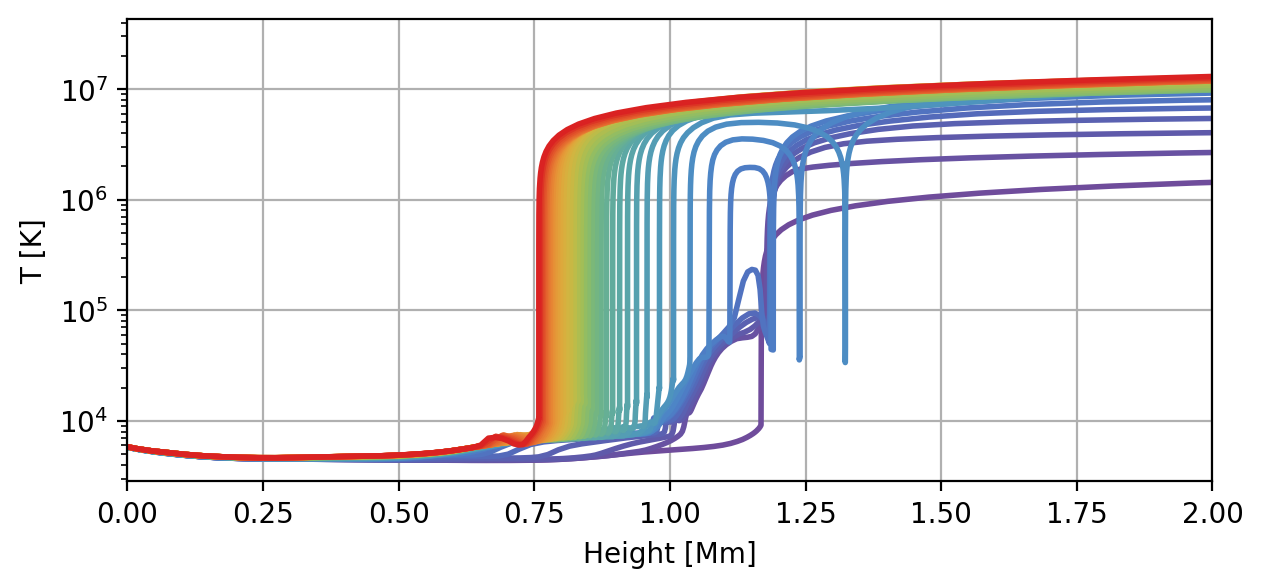

In [22]:
#timesinit=[0,5,10,15,20,50,100,300,500]
#timesinit = [0,2,4,6,8,10,12,14,16,18,20]
samples = np.arange(0,40,1)
timesinit = samples


ncol2 = len(timesinit)#+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_PuRd',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

#linestyles = ['solid','dashed','solid','dashed','solid','dashed','solid','dashed','solid','dashed']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)+5))

# cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
#                     '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
#                     '#000000']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(z1t[int(timesinit[i]),:]/1e8,(tg1t[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
#ax.legend(fontsize=8)
ax.set_ylabel('T [K]')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,2])
plt.yscale('log')

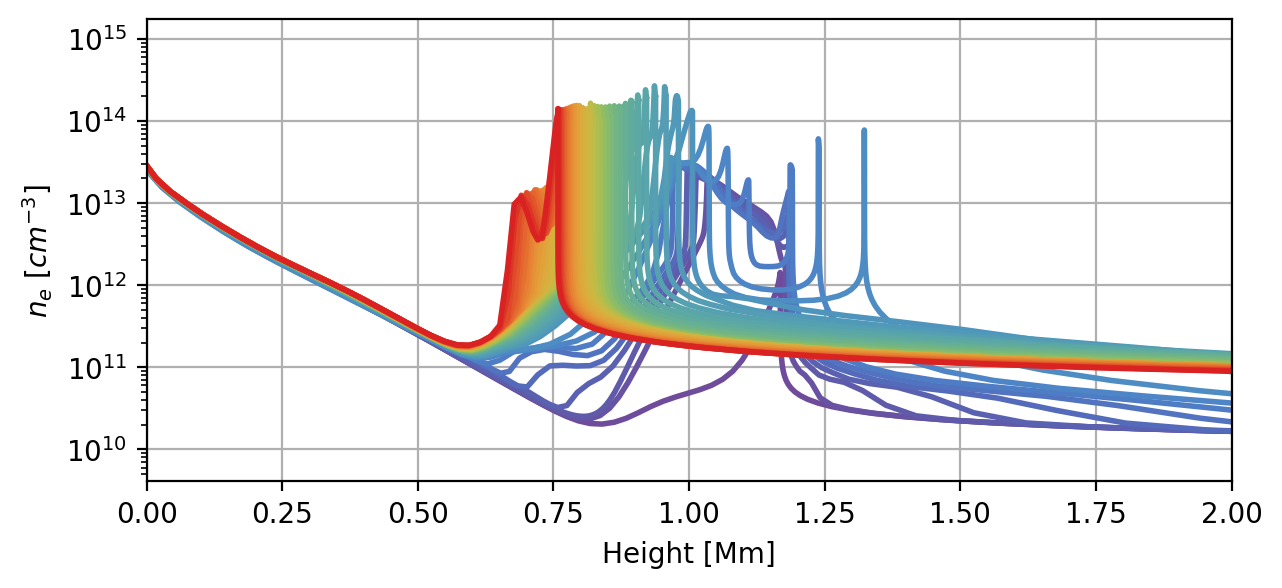

In [53]:
#timesinit=[0,5,10,15,20,50,100,300,500]
#timesinit = [0,2,4,6,8,10,12,14,16,18,20]
samples = np.arange(0,40,1)
timesinit = samples

# ncol2 = len(timesinit)#+len(times2)
# map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
# cmap_choice2 = map(np.linspace(0,1,ncol2))

# cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
#                     '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
#                     '#000000']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(z1t[int(timesinit[i]),:]/1e8,(ne1t[int(timesinit[i]),:]),label='t = '+str(round(timesinit[i],2))+'s',linewidth=2,c=cmap_choice2[i])

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
#ax.legend(fontsize=3)
ax.set_ylabel(r'$n_e$ [$cm^{-3}$]')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,2])
plt.yscale('log')

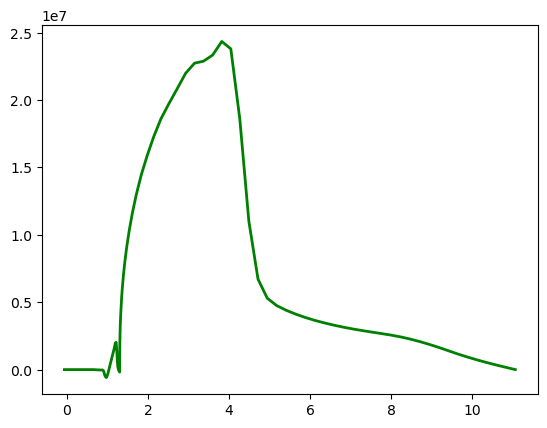

In [20]:
plt.plot(z1t[int(i),:]/1e8,vz1t[i,:],linewidth=2,c='green',label='v_z')


(0.8, 1.3)

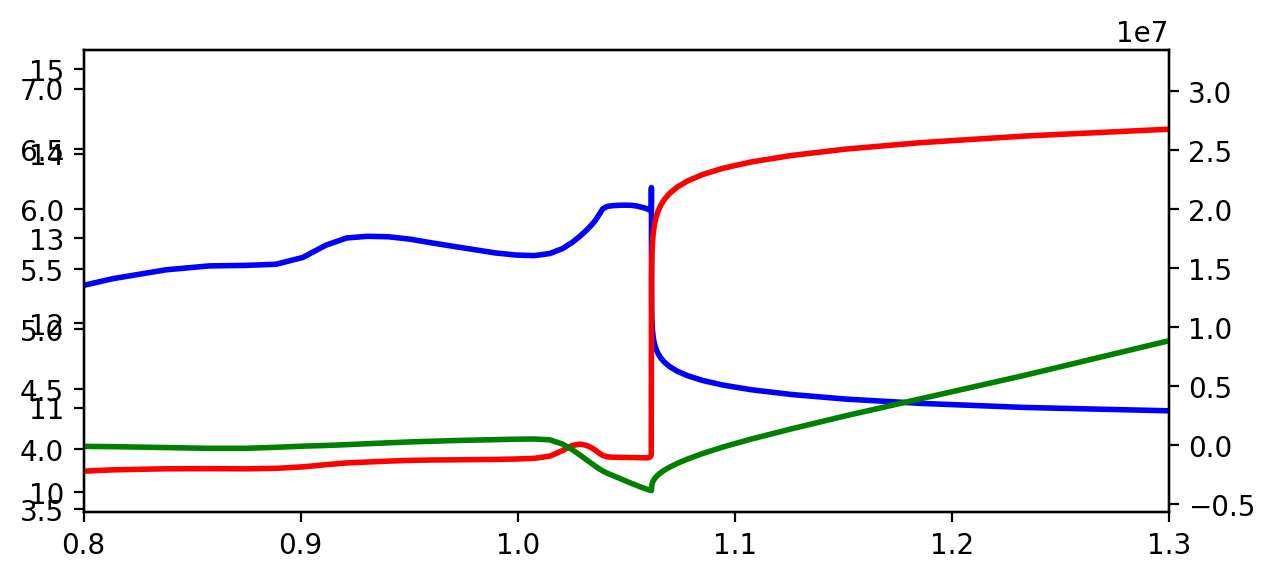

In [21]:
fig,ax=plt.subplots(dpi=200,figsize=(7,3))
i=42
ax.plot(z1t[int(i),:]/1e8,np.log10(ne1t[int(i),:]),linewidth=2,c='blue',label='n_e')
ax2=ax.twinx()
ax2.plot(z1t[int(i),:]/1e8,np.log10(tg1t[int(i),:]),linewidth=2,c='red',label='T')
ax3=ax2.twinx()
ax3.plot(z1t[int(i),:]/1e8,vz1t[i,:],linewidth=2,c='green',label='v_z')
ax.set_xlim([0.8,1.3])
ax.set_xlim([0.8,1.3])



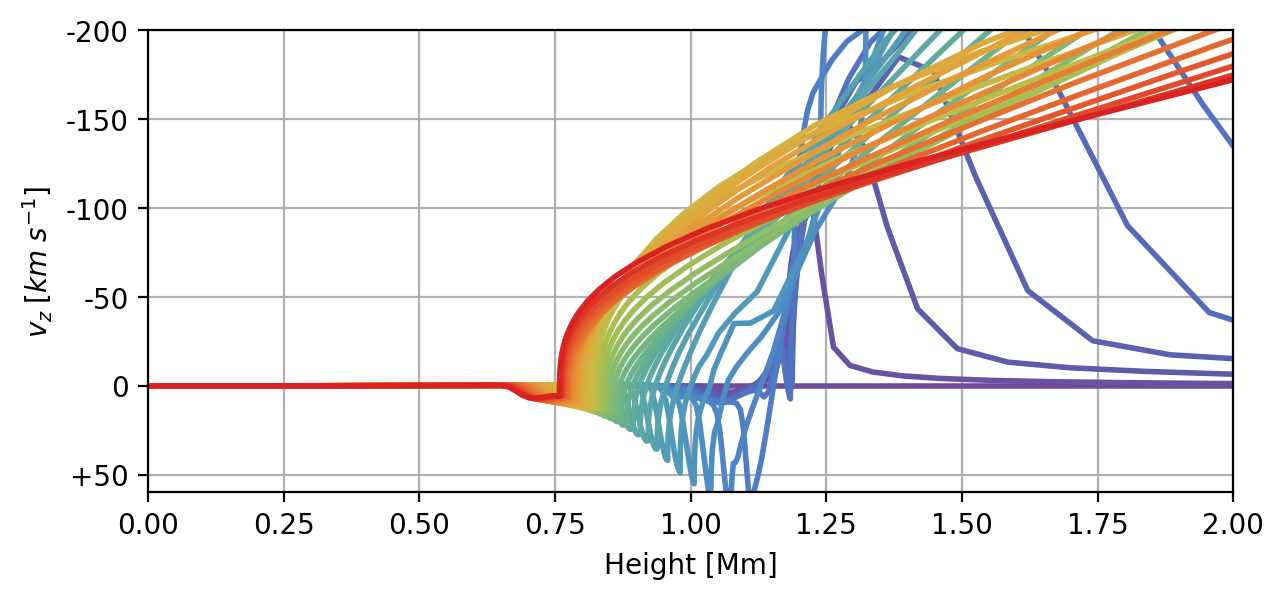

In [25]:
samples = np.arange(0,40,1)
timesinit = samples

#timesinit = [0,10,20,30,40,50,70,90]
# ncol2 = len(timesinit)#+len(times2)
# map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
# cmap_choice2 = map(np.linspace(0,1,ncol2))

# cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
#                     '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
#                     '#000000']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(z1t[int(timesinit[i]),:]/1e8,(vz1t[int(timesinit[i]),:])/1e5,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['ne1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
#ax.legend(fontsize=8,loc='lower left')
ax.set_ylabel(r'$v_z\; [km\;s^{-1}]$')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,2])
ax.set_ylim([-60,200])
ax.set_yticks([-50,0,50,100,150,200],labels=['+50','0','-50','-100','-150','-200'])
#plt.yscale('log')

In [43]:
# rh loading, for wls
base = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/'
#modelname1 = 'cat_15_8_5e10_20_600_500.npz'
modelname1='radyn_TC_90s.npz'
rh_file = np.load(base+modelname1)

wl = rh_file['wl_rh']


In [44]:
#radyn wls
line=396.85
x = (doppler_to_wavelength(line,(q[kr,:-100]*qnorm)-1))

In [45]:
np.shape(caii_h[:]-caii_h[0,:])

(601, 100)

In [46]:
len(timet)

601

In [47]:
wls = x[:-1]
#times = np.arange(0,601)
times=timet
X,Y = np.meshgrid(wls,times)

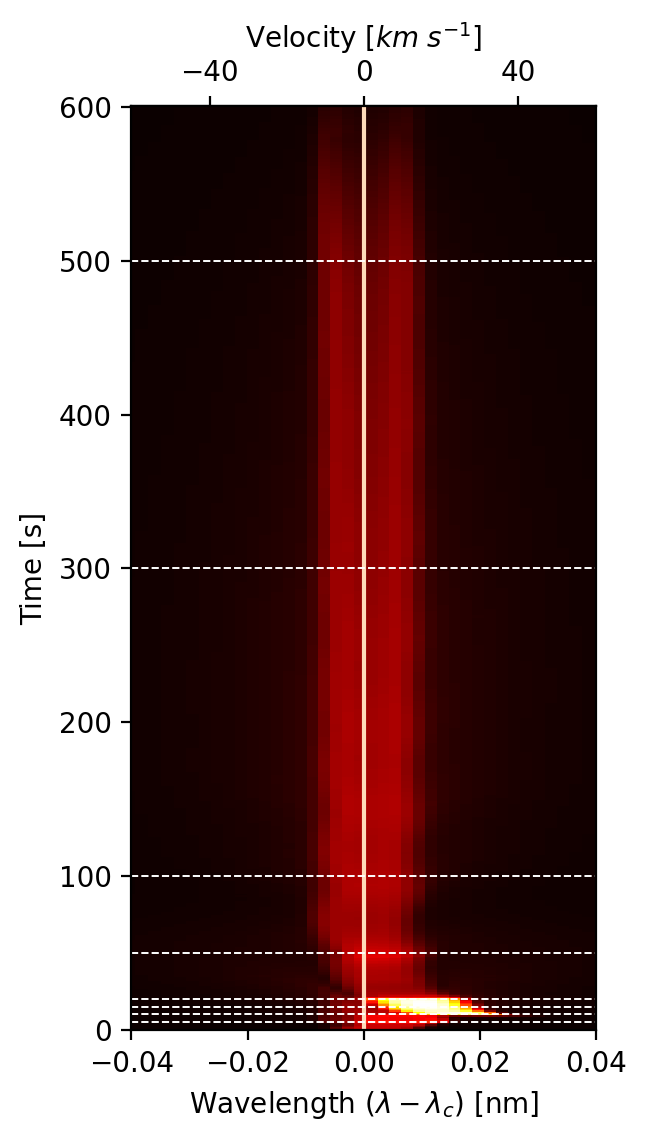

In [48]:
fig,ax=plt.subplots(dpi=200,figsize=(3,6))
ax.pcolormesh(X,Y,caii_h[:]-caii_h[0,:],cmap='hot')
#ax.set_xlim([25,75])
ax.set_xlim([-0.04,0.04])
#ax.set_xticks([396.8,396.85,396.9])
#ax.set_ylim([0,600])
ax.set_ylabel('Time [s]')
ax.axvline(0,c='peachpuff')

ax.set_xlabel(r'Wavelength ($\lambda-\lambda_c$) [nm]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
secaxx.set_xticks([-120,-80,-40,0,40,80,120])
secaxx.grid('on')

for i in timesinit:
    ax.axhline(i,c='white',linestyle='dashed',linewidth=.7)

In [49]:
wls

array([ 5.14642615e+00,  3.93170841e+00,  3.00857438e+00,  2.30691434e+00,
        1.77347610e+00,  1.36781164e+00,  1.05919847e+00,  8.24301121e-01,
        6.45395042e-01,  5.09017436e-01,  4.04942565e-01,  3.25403414e-01,
        2.64500502e-01,  2.17752850e-01,  1.81756902e-01,  1.53927470e-01,
        1.32300960e-01,  1.15385914e-01,  1.02049485e-01,  9.14312156e-02,
        8.28775385e-02,  7.58920339e-02,  7.00976433e-02,  6.52079697e-02,
        6.10054788e-02,  5.73249412e-02,  5.40408559e-02,  5.10578979e-02,
        4.83036624e-02,  4.57231540e-02,  4.32746004e-02,  4.09262731e-02,
        3.86540723e-02,  3.64396926e-02,  3.42692295e-02,  3.21321216e-02,
        3.00203458e-02,  2.79278076e-02,  2.58498764e-02,  2.37830338e-02,
        2.17246052e-02,  1.96725564e-02,  1.76253387e-02,  1.55817715e-02,
        1.35409517e-02,  1.15021854e-02,  9.46493516e-03,  7.42877871e-03,
        5.39337718e-03,  3.35844912e-03,  1.32374911e-03, -7.10950897e-04,
       -2.74587896e-03, -

In [50]:
num=-20

plt.plot((psf_adjust(wavelengths[:-50]/u.nm, outintt[int(timesinit[i]),kr,muind,:-52]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-52]*1.9e11,fwhm,wavelengths[:-50]/u.nm,ntw,gaussian_psf)))

IndexError: list index out of range

In [51]:
x

array([ 5.14642615e+00,  3.93170841e+00,  3.00857438e+00,  2.30691434e+00,
        1.77347610e+00,  1.36781164e+00,  1.05919847e+00,  8.24301121e-01,
        6.45395042e-01,  5.09017436e-01,  4.04942565e-01,  3.25403414e-01,
        2.64500502e-01,  2.17752850e-01,  1.81756902e-01,  1.53927470e-01,
        1.32300960e-01,  1.15385914e-01,  1.02049485e-01,  9.14312156e-02,
        8.28775385e-02,  7.58920339e-02,  7.00976433e-02,  6.52079697e-02,
        6.10054788e-02,  5.73249412e-02,  5.40408559e-02,  5.10578979e-02,
        4.83036624e-02,  4.57231540e-02,  4.32746004e-02,  4.09262731e-02,
        3.86540723e-02,  3.64396926e-02,  3.42692295e-02,  3.21321216e-02,
        3.00203458e-02,  2.79278076e-02,  2.58498764e-02,  2.37830338e-02,
        2.17246052e-02,  1.96725564e-02,  1.76253387e-02,  1.55817715e-02,
        1.35409517e-02,  1.15021854e-02,  9.46493516e-03,  7.42877871e-03,
        5.39337718e-03,  3.35844912e-03,  1.32374911e-03, -7.10950897e-04,
       -2.74587896e-03, -

In [78]:
timesinit

[0, 5, 10, 15, 20, 50, 100, 300, 500]

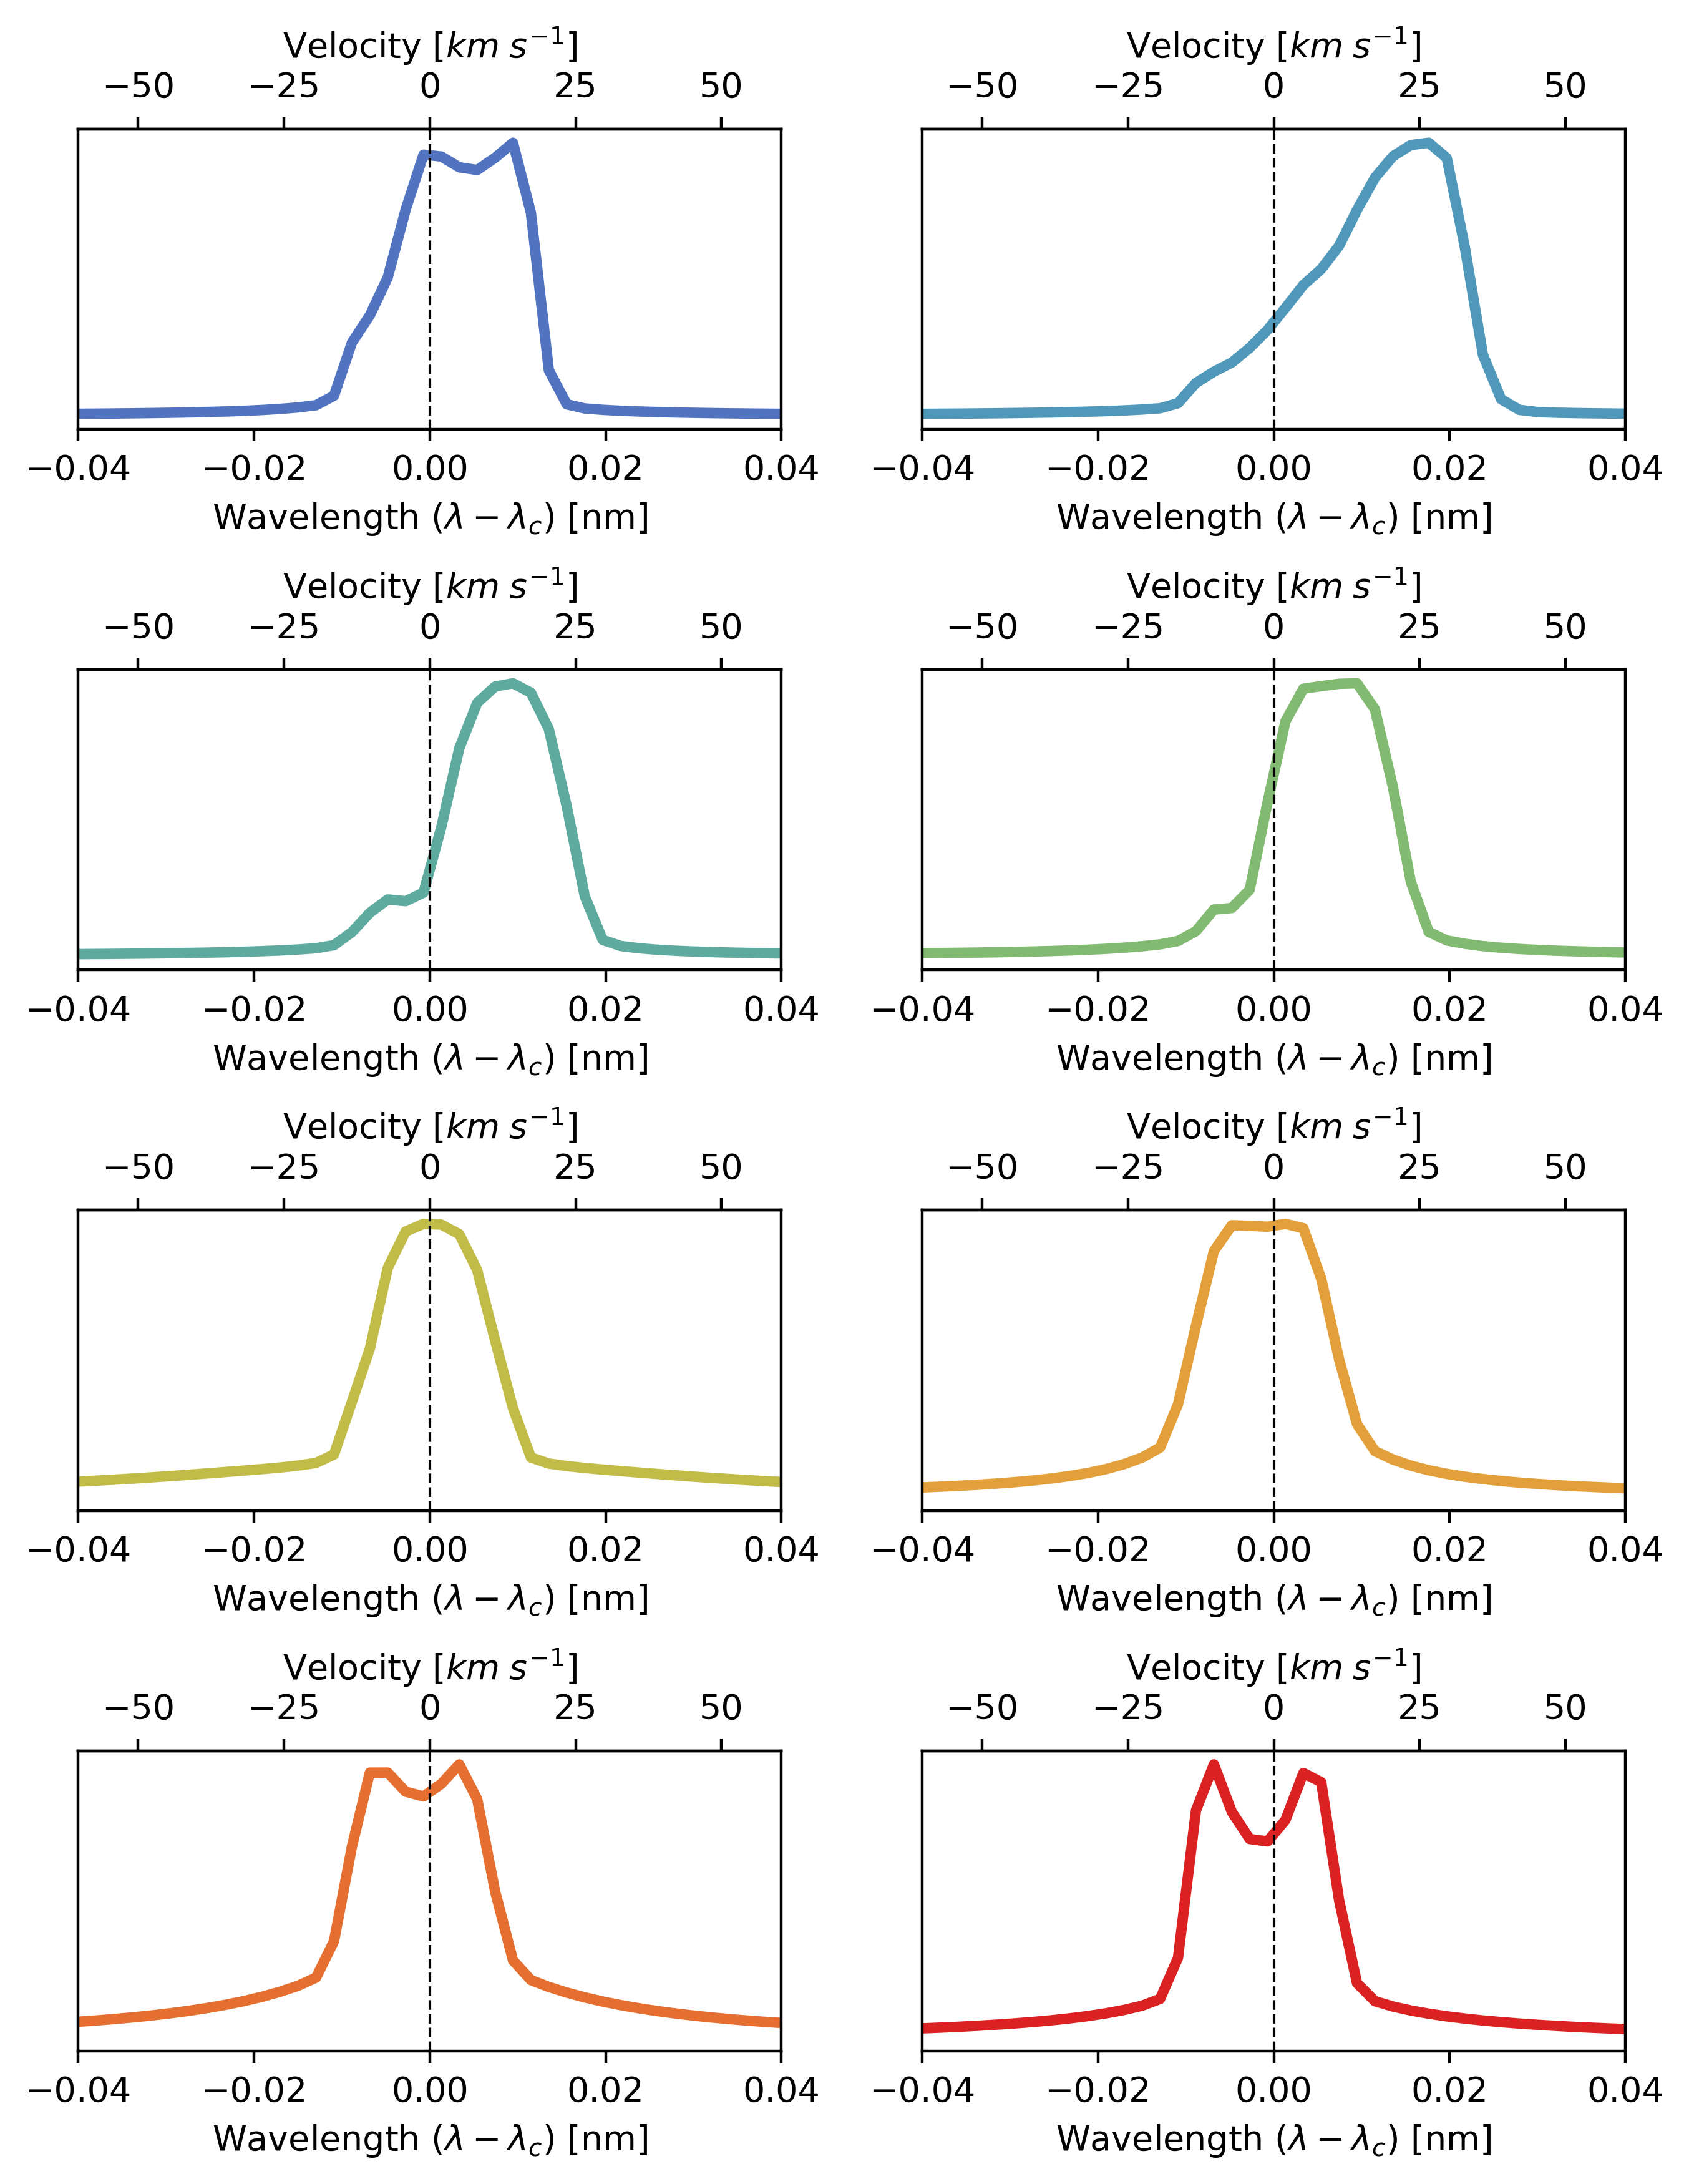

In [80]:
from labellines import *
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))


fig,ax=plt.subplots(4,2,figsize=(8,10),dpi=400)

for i in range(8):
    x = (doppler_to_wavelength(line,(q[kr,:-100]*qnorm)-1))
    
    ax.flatten()[i].plot(x[:-6],(psf_adjust(wavelengths[:-105]/u.nm, outintt[int(timesinit[i+1]),kr,muind,:-107]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-107]*1.9e11,fwhm,wavelengths[:-105]/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i+1],label='t = '+str(round(timesinit[i+1],2))+'s',linewidth=3)
    ax.flatten()[i].axvline(0,c='black',linestyle='dashed',linewidth=0.75)
    ax.flatten()[i].set_xlim([.04,-.04])
    # xvals = np.zeros(30)
    # for i in range(len(xvals)):
    #     xvals[i] = -0.04
    #for i in range(len(times2)):
    #    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
    ax.flatten()[i].invert_xaxis()
    #ax.legend()
    #ax.axvline(0,c='black')
    
    #ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
    secaxx = ax.flatten()[i].secondary_xaxis('top', functions=(veltrans,wltrans))
    secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
    ax.flatten()[i].set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]')
    ax.flatten()[i].tick_params(axis='both', which='major')
    
    secaxx.tick_params(axis='both', which='major')
    #ax.set_ylim([-1,50])
    ax.flatten()[i].yaxis.set_ticks([])
plt.subplots_adjust(hspace=0.8)

In [109]:
!pip install matplotlib-label-lines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.2/826.2 kB 13.4 MB/s eta 0:00:00


[]

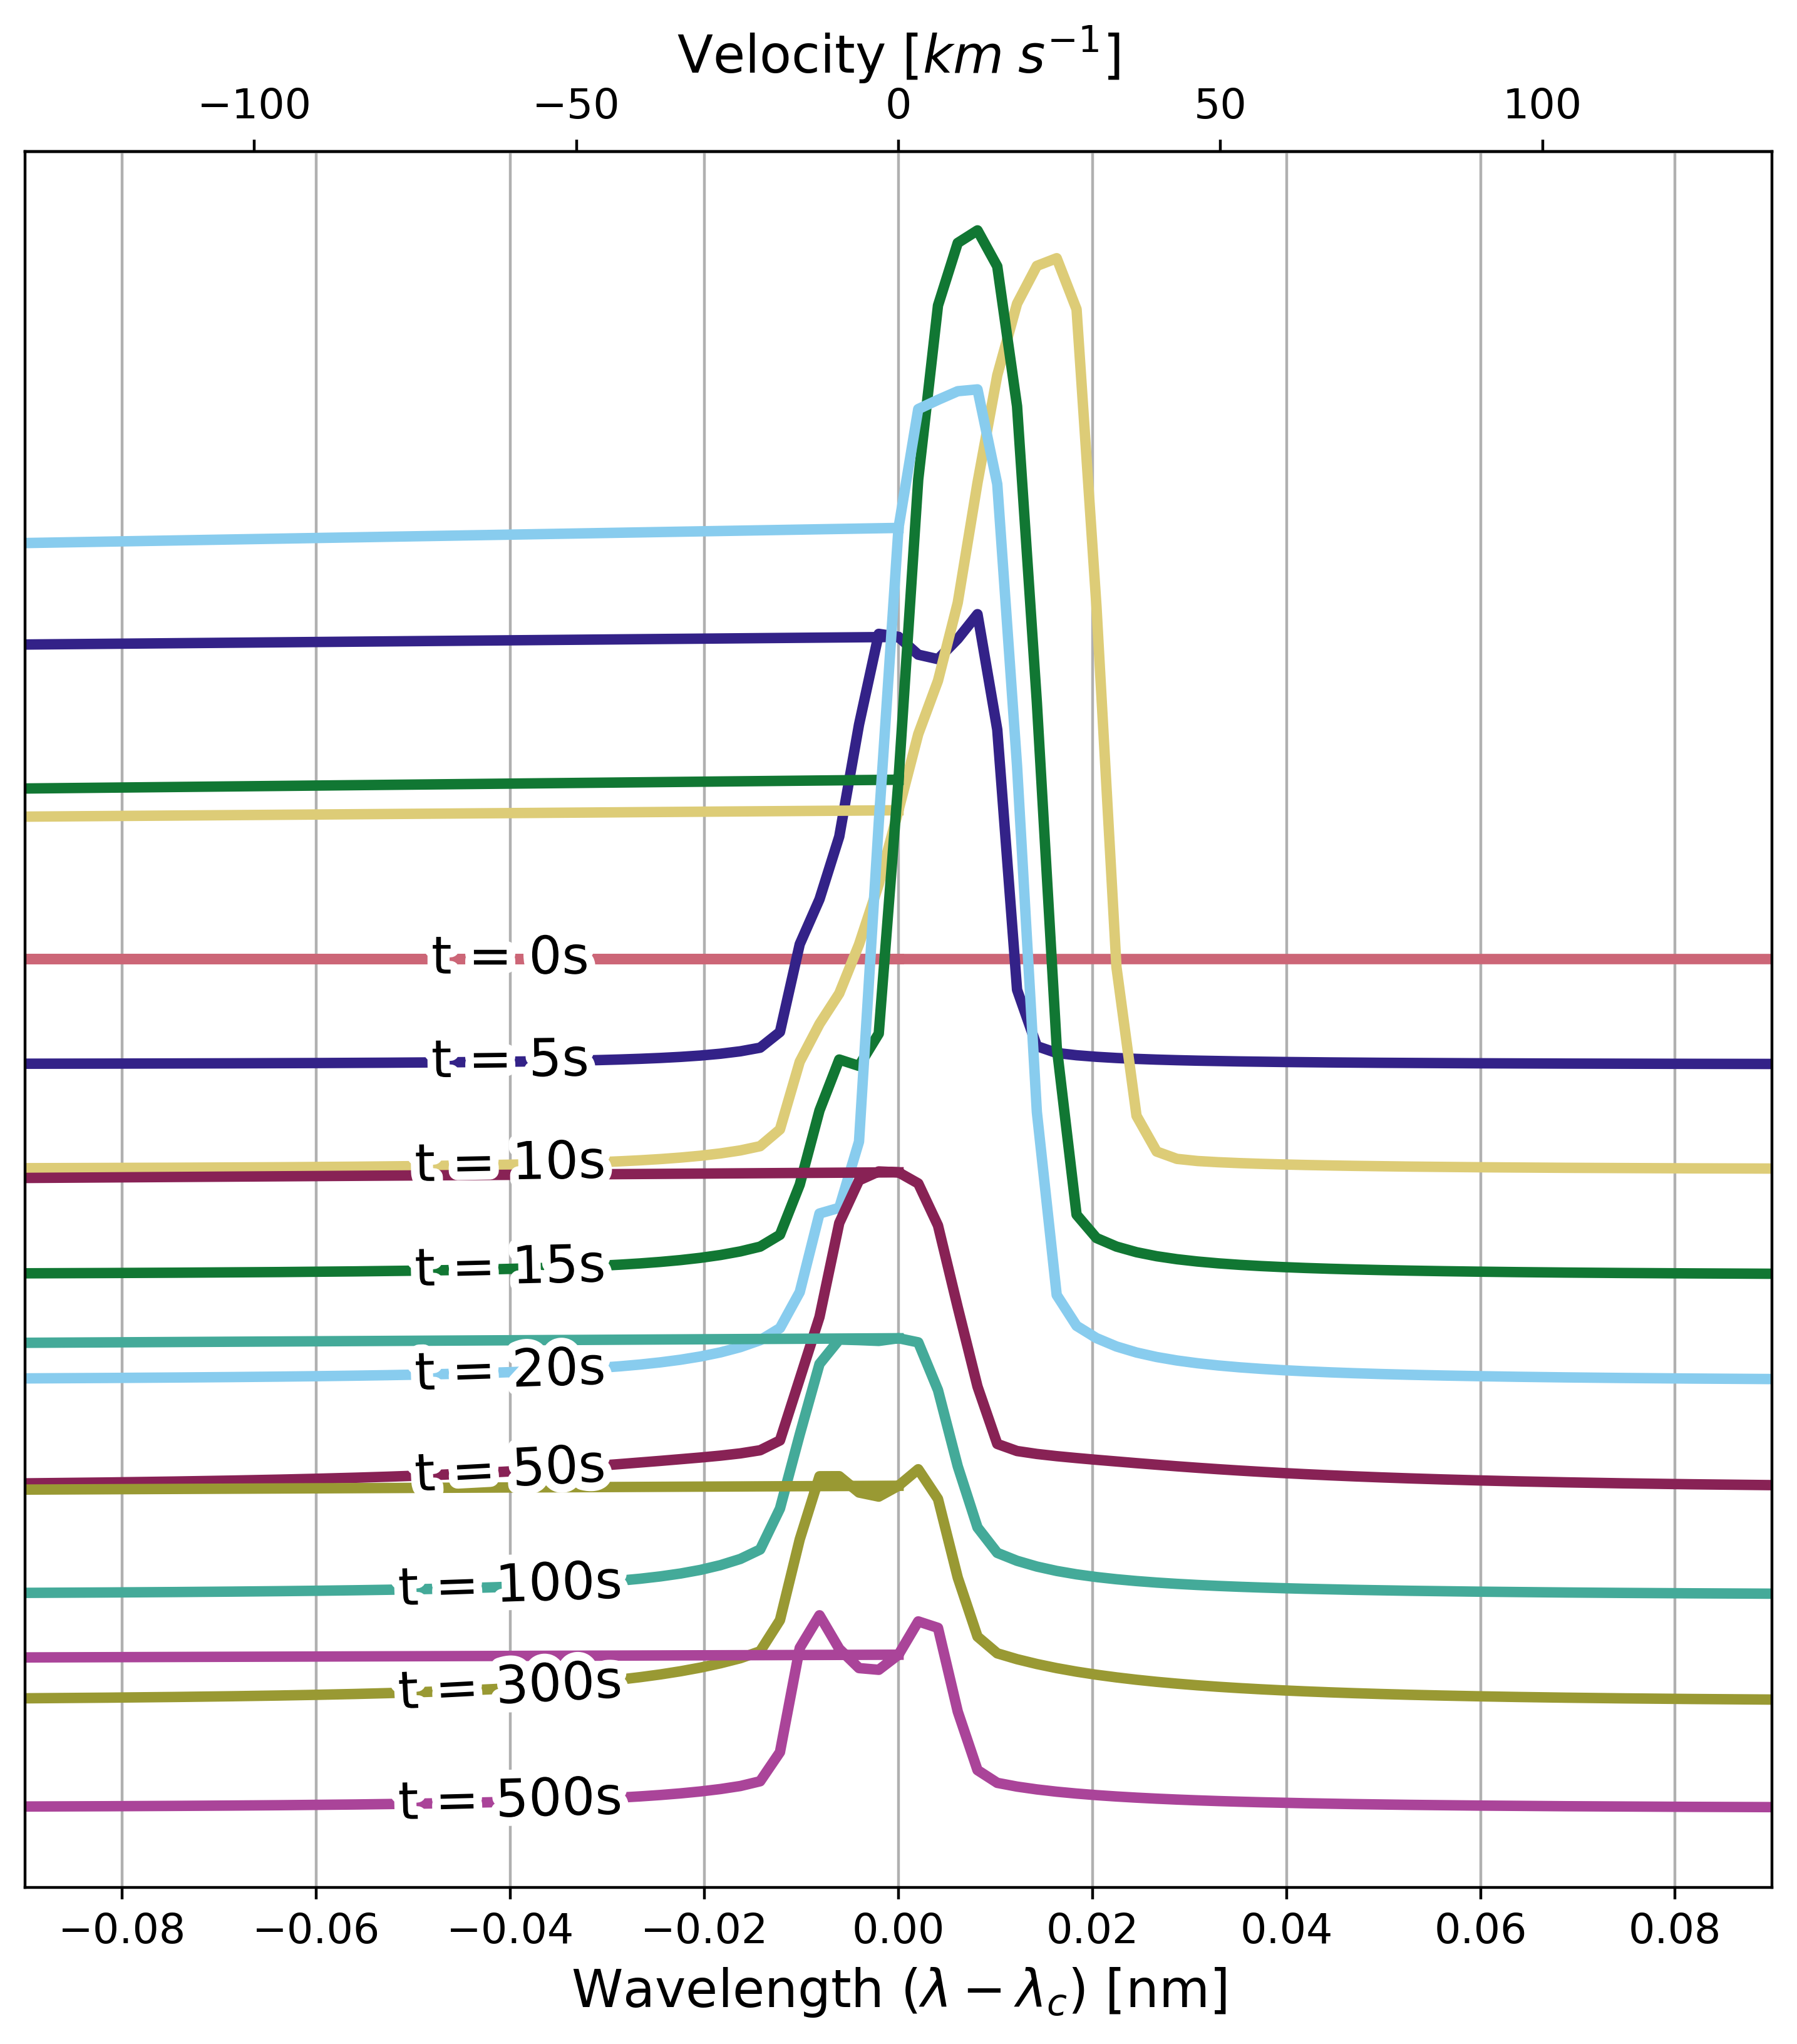

In [30]:
from labellines import *
cmap_choice2 = ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE',
                    '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD',
                    '#000000']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

wavelengths = (doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm))

fig,ax=plt.subplots(figsize=(9,9),dpi=400)
for i in range(len(timesinit)):
    #if i==2:
    #    #ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),marker='o',color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
    #    ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[-i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

    #else:
    ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[i],label='t = '+str(round(timesinit[i],2))+'s',linewidth=3)
       
    ax.set_xlim([.09,-.09])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
#ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
secaxx.tick_params(axis='both', which='major', labelsize=12)
#ax.yaxis.
ax.yaxis.set_ticks([])

In [175]:
timesinit

[0, 5, 10, 15, 20, 50, 100, 300, 500]

In [131]:
timesinit


[0, 5, 10, 15, 20, 50, 100, 300, 500]

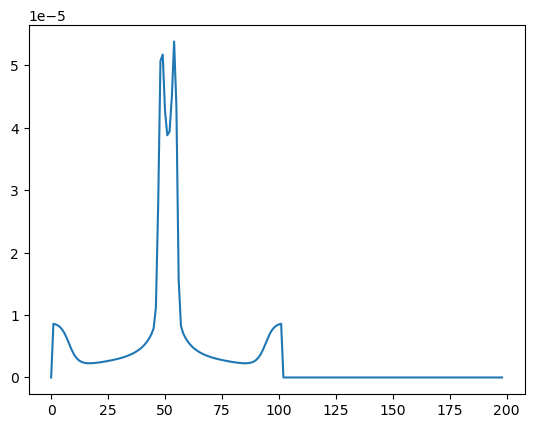

In [132]:
plt.plot(outintt[int(timesinit[8]),kr,muind,:-3])

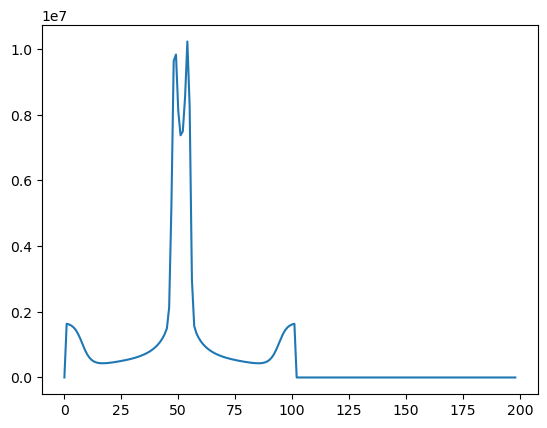

In [135]:
i=8
plt.plot(outintt[int(timesinit[i]),kr,muind,:-3]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-3])